In [52]:
library(readr)
df <- read_csv("D:/JD crawler/reviews_pre_match.csv",locale = locale(encoding = stringi::stri_enc_get()))
drops <- c("X1")
df <- df[ , !(names(df) %in% drops)]
head(df,1)

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_integer(),
  membershipLevel = col_character(),
  commentContent = col_character(),
  commentTime = col_datetime(format = ""),
  source = col_character(),
  productName = col_character(),
  imageCount = col_integer(),
  containVideo = col_logical(),
  usefulVoteCount = col_integer(),
  device = col_character(),
  sentiScore = col_double(),
  actualFlag = col_integer(),
  productCate = col_character(),
  commentHour = col_integer(),
  commentLen = col_integer(),
  treat = col_integer()
)


membershipLevel,commentContent,commentTime,source,productName,imageCount,containVideo,usefulVoteCount,device,sentiScore,actualFlag,productCate,commentHour,commentLen,treat
<chr>,<chr>,<dttm>,<chr>,<chr>,<int>,<lgl>,<int>,<chr>,<dbl>,<int>,<chr>,<int>,<int>,<int>
Plus,这下够穿了，真的挺实惠的，颜色也很喜欢，看看能穿住了吧,2019-05-08 08:45:00,Android,俞兆林10双袜子男短袜秋季65%纯棉船袜夏季隐形浅口潮袜运动篮球棉袜男 10双装Beer男短袜 均码,3,FALSE,0,Mobile Phone,0.99711,1,Clothes,9,24,0


In [53]:
bartlett.test(sentiScore ~ device, data=df)


	Bartlett test of homogeneity of variances

data:  sentiScore by device
Bartlett's K-squared = 109.9, df = 1, p-value < 2.2e-16


In [54]:
library(readr)
df <- read_csv("D:/JD crawler/propensity score matching/pcm_output.csv",locale = locale(encoding = stringi::stri_enc_get()))
drops <- c("X1","distance","weights")
df <- df[ , !(names(df) %in% drops)]
head(df,1)

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_integer(),
  membershipLevel = col_character(),
  commentContent = col_character(),
  commentTime = col_datetime(format = ""),
  source = col_character(),
  productName = col_character(),
  imageCount = col_integer(),
  containVideo = col_logical(),
  usefulVoteCount = col_integer(),
  device = col_character(),
  sentiScore = col_double(),
  actualFlag = col_integer(),
  productCate = col_character(),
  commentHour = col_integer(),
  commentLen = col_integer(),
  treat = col_integer(),
  distance = col_double(),
  weights = col_integer()
)


membershipLevel,commentContent,commentTime,source,productName,imageCount,containVideo,usefulVoteCount,device,sentiScore,actualFlag,productCate,commentHour,commentLen,treat
<chr>,<chr>,<dttm>,<chr>,<chr>,<int>,<lgl>,<int>,<chr>,<dbl>,<int>,<chr>,<int>,<int>,<int>
Plus,东西不错 继续支持,2019-08-05 10:39:00,PC,红双喜连环白色40mm乒乓球业余比赛训练用球1840D,0,FALSE,0,PC,0.9879214,1,Outdoor & Sports,11,8,1


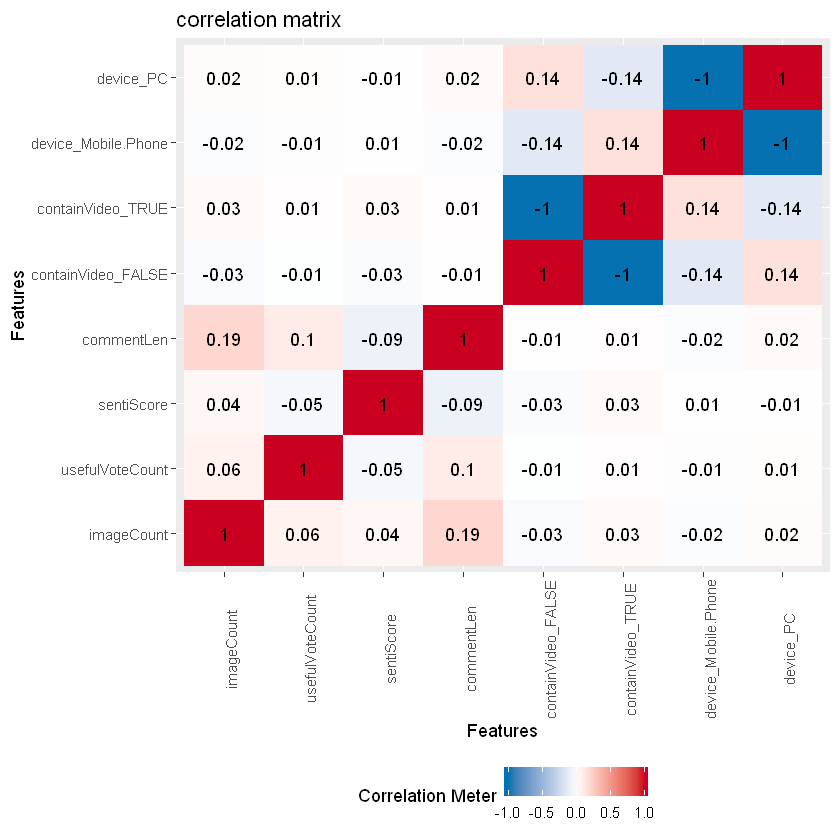

In [55]:
library("DataExplorer")
plot_correlation(df[c(6,7,8,9,10,14)], maxcat = 20L, title= 'correlation matrix')

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
11054,15,8,7,0,0,11054,165810,2809256


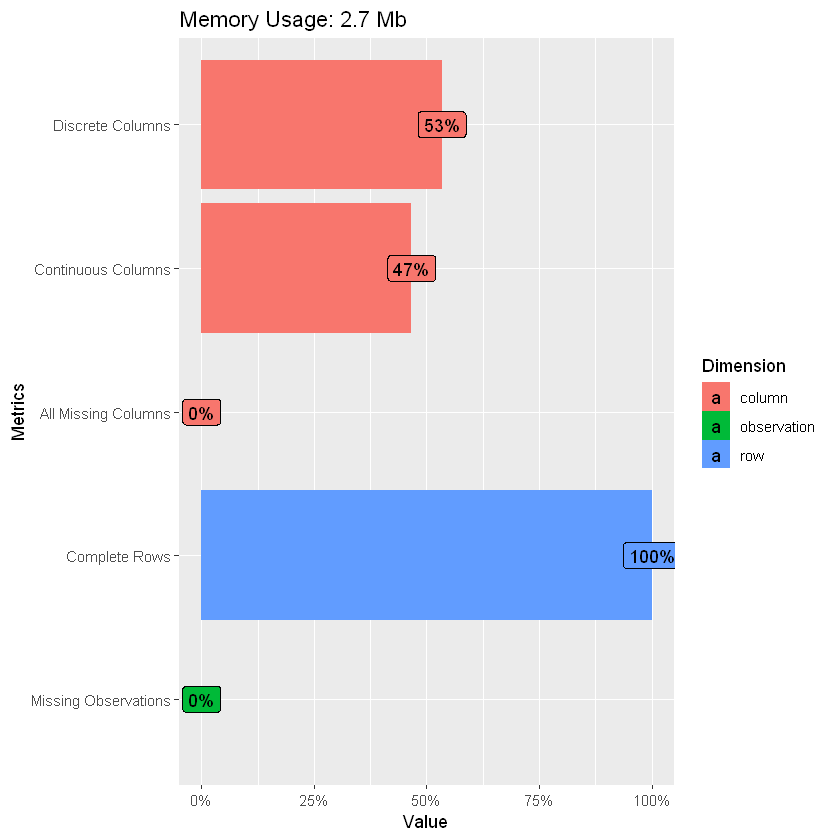

3 columns ignored with more than 50 categories.
commentContent: 10260 categories
commentTime: 10465 categories
productName: 243 categories



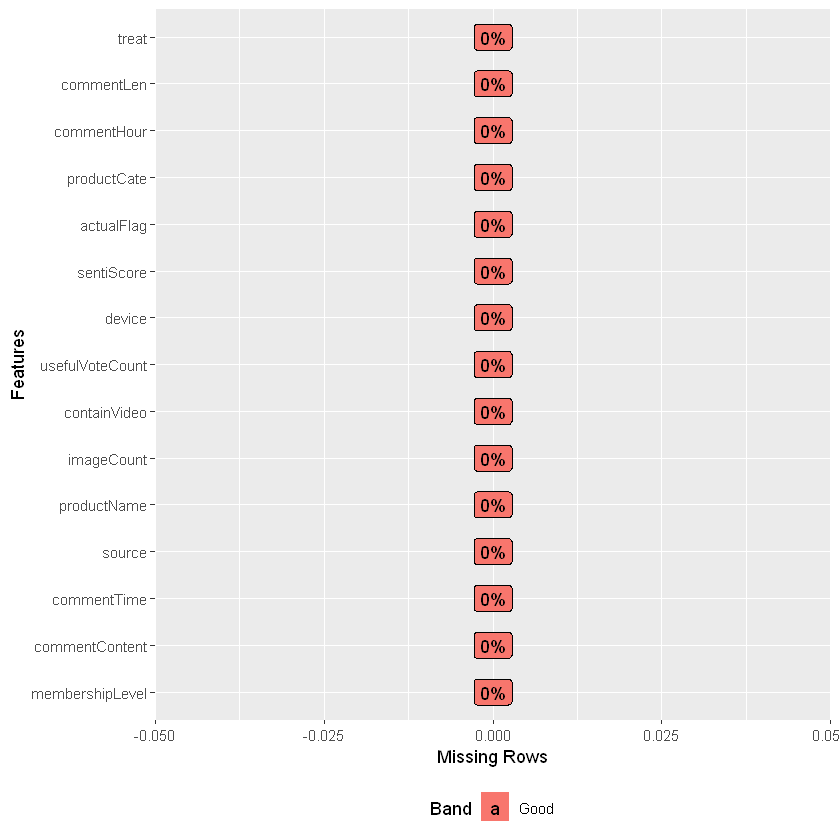

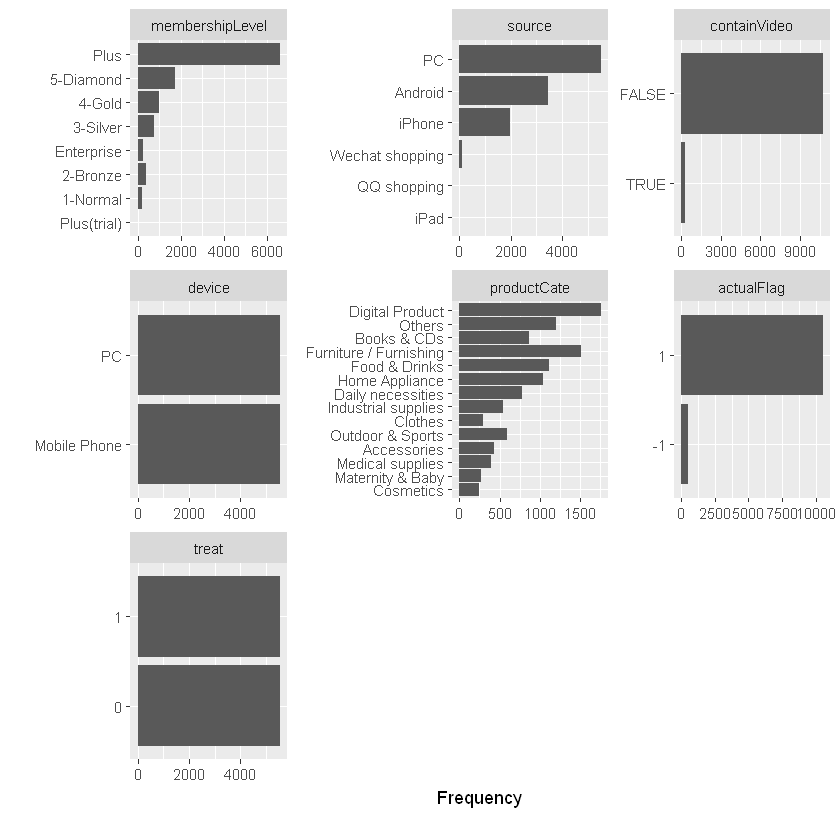

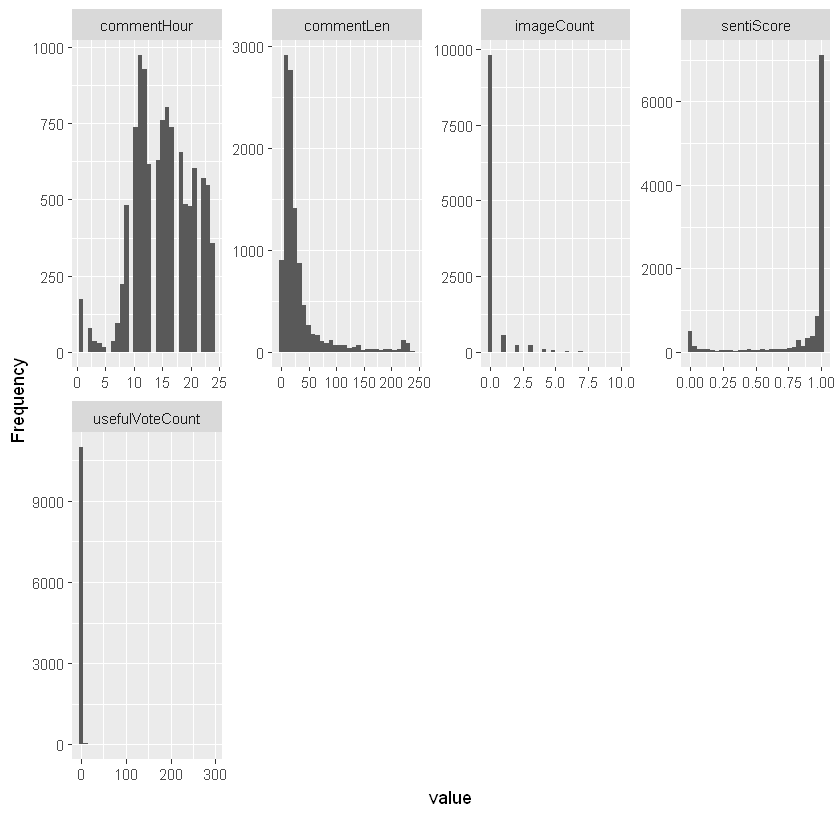

In [56]:
introduce(df)
plot_intro(df)
plot_missing(df)
plot_bar(df, binary_as_factor = TRUE)
plot_histogram(df)

In [57]:
bartlett.test(sentiScore ~ device, data=df)


	Bartlett test of homogeneity of variances

data:  sentiScore by device
Bartlett's K-squared = 1.251, df = 1, p-value = 0.2634


In [58]:
attach(df)
table(device)
aggregate(sentiScore, by = list(device), FUN = mean)
aggregate(sentiScore, by = list(device), FUN = sd)
fit <- aov(sentiScore ~ device)
summary(fit)

The following objects are masked from df (pos = 6):

    actualFlag, commentContent, commentHour, commentLen, commentTime,
    containVideo, device, imageCount, membershipLevel, productCate,
    productName, sentiScore, source, treat, usefulVoteCount



device
Mobile Phone           PC 
        5527         5527 

Group.1,x
<chr>,<dbl>
Mobile Phone,0.8671184
PC,0.8642116


Group.1,x
<chr>,<dbl>
Mobile Phone,0.2798661
PC,0.2841090


               Df Sum Sq Mean Sq F value Pr(>F)
device          1    0.0 0.02335   0.294  0.588
Residuals   11052  878.9 0.07952               

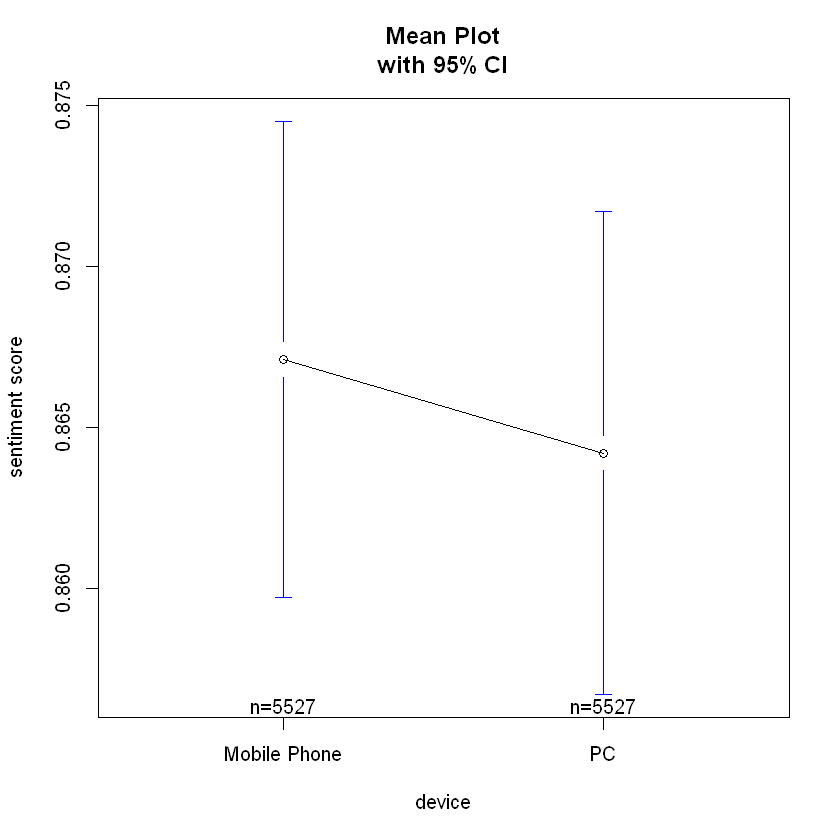

In [59]:
library(gplots)
plotmeans(sentiScore ~ device, xlab="device", ylab="sentiment score",
main="Mean Plot\nwith 95% CI")

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = sentiScore ~ device)

$device
                        diff        lwr         upr     p adj
PC-Mobile Phone -0.002906829 -0.0134218 0.007608143 0.5879088


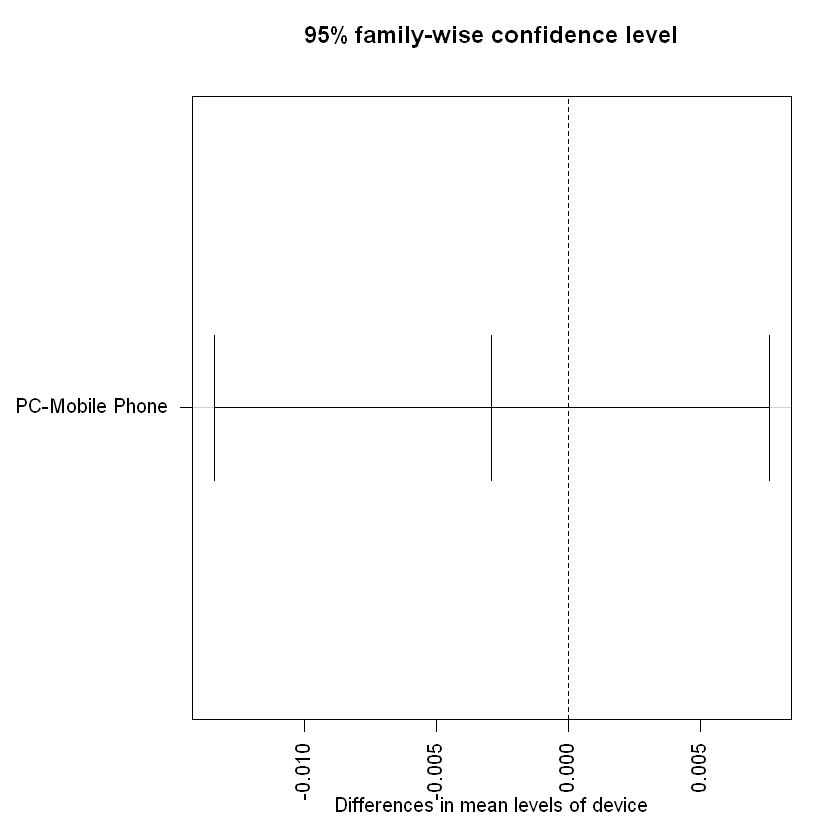

In [60]:
TukeyHSD(fit)
par(las=2)
par(mar=c(5,8,4,2))
plot(TukeyHSD(fit))

In [61]:
table(device, productCate)

              productCate
device         Accessories Books & CDs Clothes Cosmetics Daily necessities
  Mobile Phone         218         425     145       120               383
  PC                   210         444     149       127               399
              productCate
device         Digital Product Food & Drinks Furniture / Furnishing
  Mobile Phone             882           544                    756
  PC                       886           571                    752
              productCate
device         Home Appliance Industrial supplies Maternity & Baby
  Mobile Phone            528                 281              140
  PC                      515                 268              130
              productCate
device         Medical supplies Others Outdoor & Sports
  Mobile Phone              194    611              300
  PC                        200    589              287

In [62]:
aggregate(sentiScore, by=list(device, productCate), FUN=mean)
aggregate(sentiScore, by=list(device, productCate), FUN=sd)

Group.1,Group.2,x
<chr>,<chr>,<dbl>
Mobile Phone,Accessories,0.8861464
PC,Accessories,0.8423356
Mobile Phone,Books & CDs,0.7841730
PC,Books & CDs,0.7485741
Mobile Phone,Clothes,0.9311019
PC,Clothes,0.8998451
Mobile Phone,Cosmetics,0.9182197
PC,Cosmetics,0.9059775
Mobile Phone,Daily necessities,0.9124094


Group.1,Group.2,x
<chr>,<chr>,<dbl>
Mobile Phone,Accessories,0.2362888
PC,Accessories,0.2830340
Mobile Phone,Books & CDs,0.3439803
PC,Books & CDs,0.3663824
Mobile Phone,Clothes,0.1815539
PC,Clothes,0.2381914
Mobile Phone,Cosmetics,0.2250003
PC,Cosmetics,0.2340919
Mobile Phone,Daily necessities,0.2224470


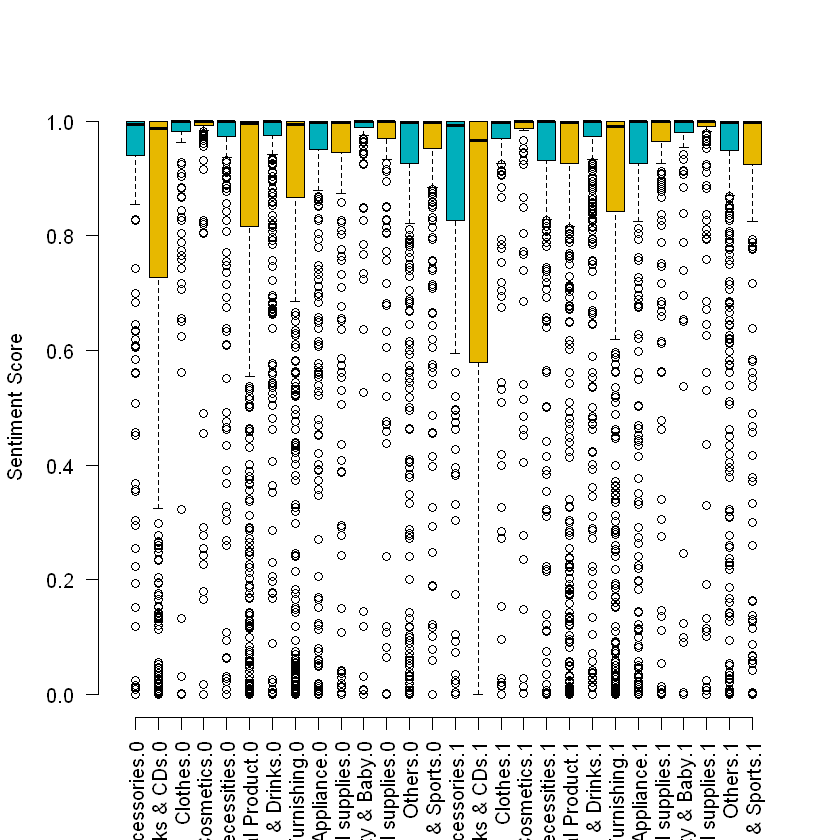

In [63]:
# Box plot with two factor variables
boxplot(sentiScore ~ productCate * treat, data=df, frame = FALSE, 
        col = c("#00AFBB", "#E7B800"), ylab="Sentiment Score", las=2, cex.names=.5)

In [64]:
fit2 <- aov(sentiScore ~ device*productCate)
summary(fit2)

                      Df Sum Sq Mean Sq F value   Pr(>F)    
device                 1    0.0  0.0234   0.301 0.583119    
productCate           13   21.4  1.6482  21.263  < 2e-16 ***
device:productCate    13    2.8  0.2118   2.733 0.000712 ***
Residuals          11026  854.7  0.0775                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = sentiScore ~ device * productCate)

$device
                        diff         lwr         upr     p adj
PC-Mobile Phone -0.002906829 -0.01328836 0.007474702 0.5831194

$productCate
                                                    diff           lwr
Books & CDs-Accessories                    -0.0986071181 -0.1537570850
Clothes-Accessories                         0.0506573764 -0.0200850724
Cosmetics-Accessories                       0.0473430292 -0.0272826962
Daily necessities-Accessories               0.0391438669 -0.0170093271
Digital Product-Accessories                -0.0363791825 -0.0866898632
Food & Drinks-Accessories                   0.0517689491 -0.0013354727
Furniture / Furnishing-Accessories         -0.0319339126 -0.0830829142
Home Appliance-Accessories                  0.0027648481 -0.0508455877
Industrial supplies-Accessories             0.0367761019 -0.0234446627
Maternity &

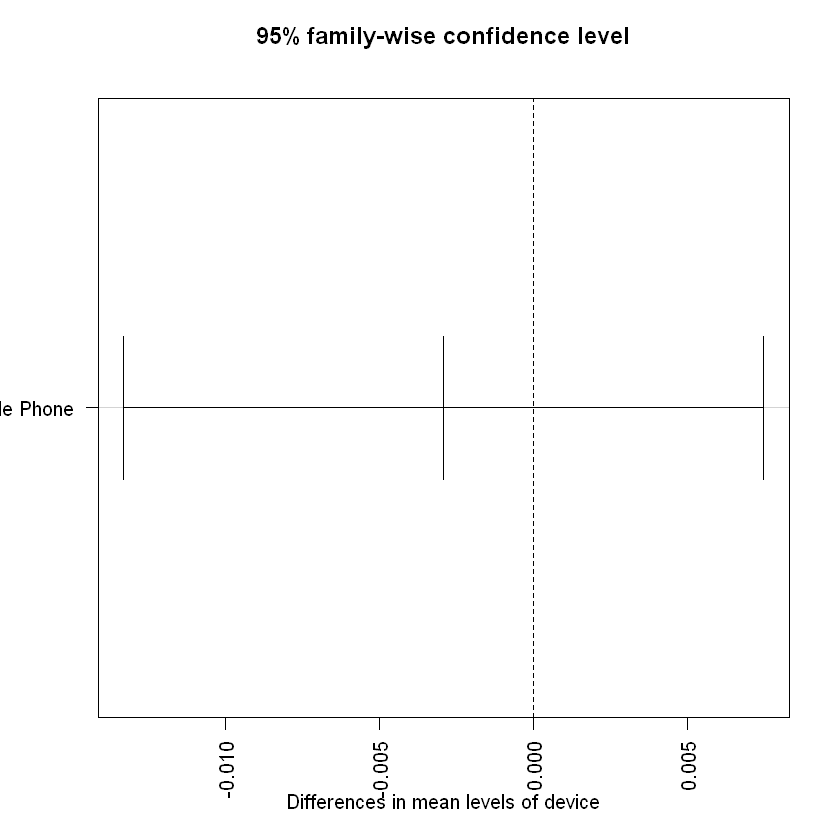

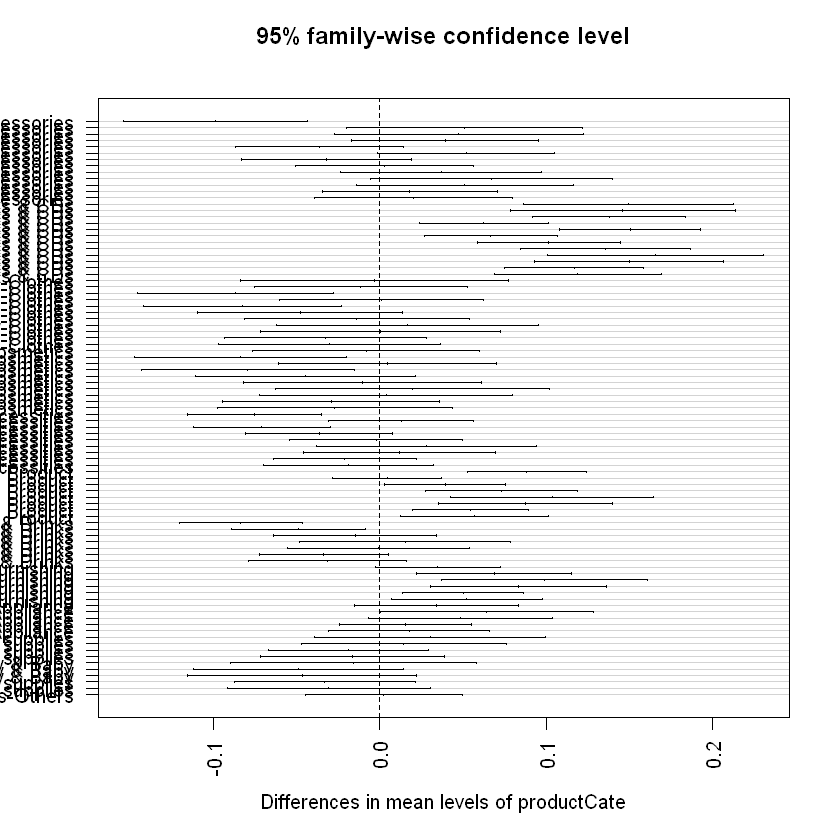

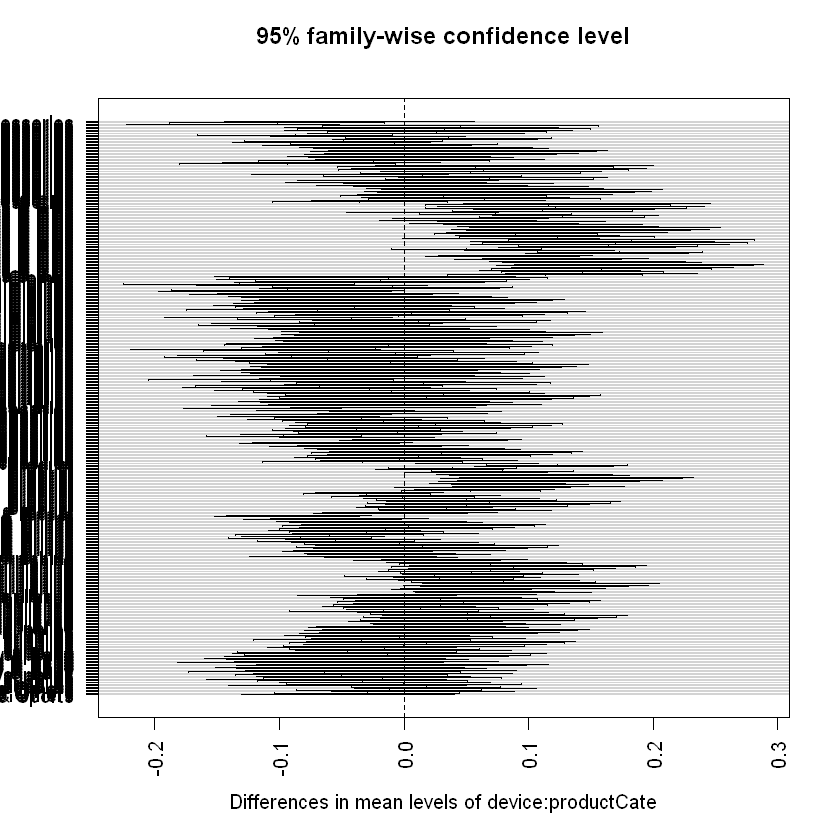

In [65]:
TukeyHSD(fit2)
par(las=2)
plot(TukeyHSD(fit2))

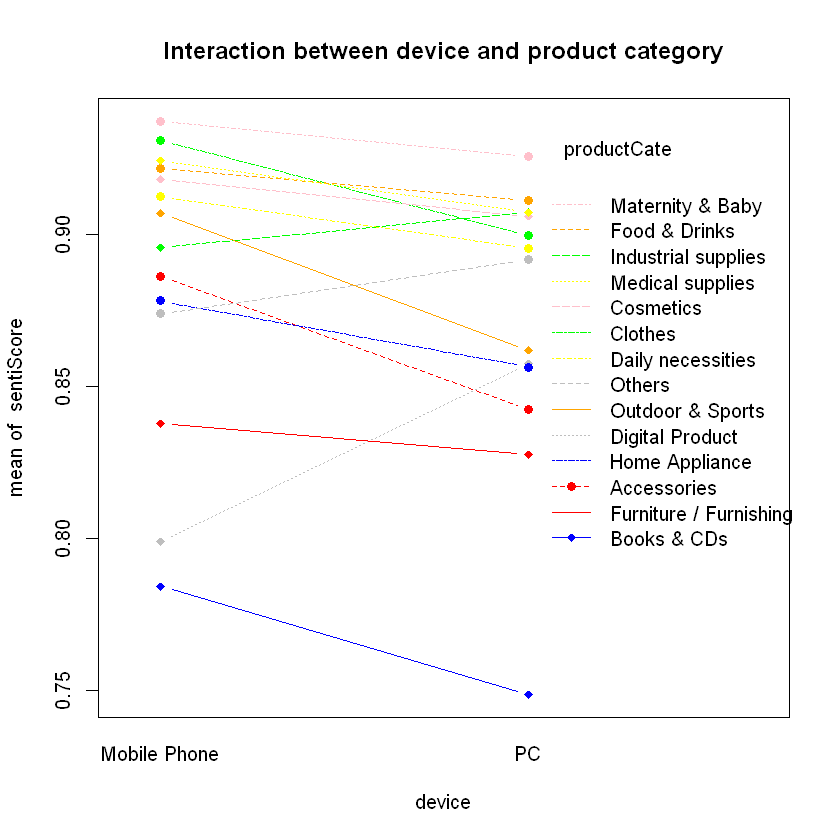

In [66]:
interaction.plot(device, productCate, sentiScore, type="b",
col=c("red","blue","green","pink","yellow","grey","orange"), pch=c(16, 18),
main = "Interaction between device and product category")

# install.packages("HH")
# library(HH)
# interaction2wt(sentiScore~productCate*device)

In [67]:
# library("car")
# fit2.1 <- aov(sentiScore ~ device*productCate, data = df)
# fit2.2 <- Anova(fit2.1, type ='III')
# fit2.2

In [68]:
table(device, membershipLevel)

              membershipLevel
device         1-Normal 2-Bronze 3-Silver 4-Gold 5-Diamond Enterprise Plus
  Mobile Phone      113      213      386    506       869        143 3283
  PC                100      195      381    510       871        133 3320
              membershipLevel
device         Plus(trial)
  Mobile Phone          14
  PC                    17

In [69]:
aggregate(sentiScore, by=list(device, membershipLevel), FUN=mean)
aggregate(sentiScore, by=list(device, membershipLevel), FUN=sd)

Group.1,Group.2,x
<chr>,<chr>,<dbl>
Mobile Phone,1-Normal,0.8690274
PC,1-Normal,0.8416071
Mobile Phone,2-Bronze,0.8346299
PC,2-Bronze,0.8276559
Mobile Phone,3-Silver,0.8190654
PC,3-Silver,0.7828654
Mobile Phone,4-Gold,0.8253506
PC,4-Gold,0.8173575
Mobile Phone,5-Diamond,0.8470297


Group.1,Group.2,x
<chr>,<chr>,<dbl>
Mobile Phone,1-Normal,0.2669689
PC,1-Normal,0.2989457
Mobile Phone,2-Bronze,0.2922093
PC,2-Bronze,0.3117166
Mobile Phone,3-Silver,0.3275908
PC,3-Silver,0.3438054
Mobile Phone,4-Gold,0.3145655
PC,4-Gold,0.3270017
Mobile Phone,5-Diamond,0.2997405


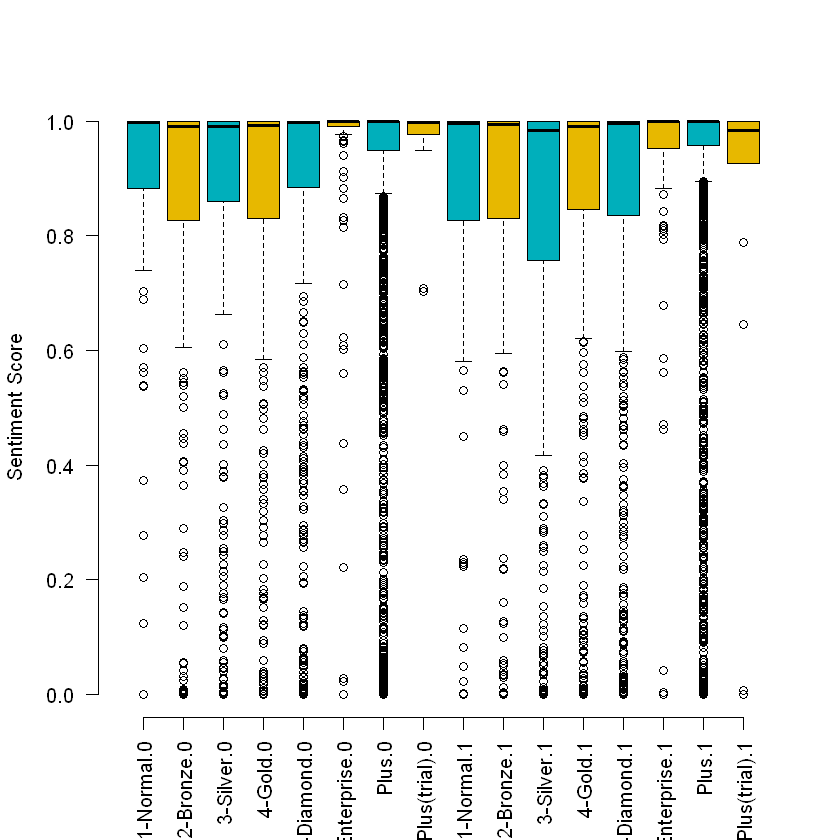

In [70]:
boxplot(sentiScore ~ membershipLevel * treat, data=df, frame = FALSE, 
        col = c("#00AFBB", "#E7B800"), ylab="Sentiment Score", las=2, cex.names=.5)

In [71]:
fit2 <- aov(sentiScore ~ device*membershipLevel)
summary(fit2)

                          Df Sum Sq Mean Sq F value Pr(>F)    
device                     1    0.0  0.0234   0.297  0.586    
membershipLevel            7   10.7  1.5265  19.420 <2e-16 ***
device:membershipLevel     7    0.5  0.0778   0.990  0.437    
Residuals              11038  867.6  0.0786                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = sentiScore ~ device * membershipLevel)

$device
                        diff         lwr         upr     p adj
PC-Mobile Phone -0.002906829 -0.01336103 0.007547374 0.5857406

$membershipLevel
                                diff          lwr        upr     p adj
2-Bronze-1-Normal      -0.0248326856 -0.096678774 0.04701340 0.9670069
3-Silver-1-Normal      -0.0549913803 -0.120818183 0.01083542 0.1818143
4-Gold-1-Normal        -0.0347212535 -0.098770864 0.02932836 0.7237756
5-Diamond-1-Normal     -0.0161355423 -0.077832522 0.04556144 0.9935284
Enterprise-1-Normal     0.0663381939 -0.011177082 0.14385347 0.1579045
Plus-1-Normal           0.0306715905 -0.028495682 0.08983886 0.7675496
Plus(trial)-1-Normal    0.0304531842 -0.132927787 0.19383416 0.9992478
3-Silver-2-Bronze      -0.0301586947 -0.082238383 0.02192099 0.6504177
4-Gold-2-Bronze        -0.0098885679 -0.059703010 0.03992587 0.9988663
5-D

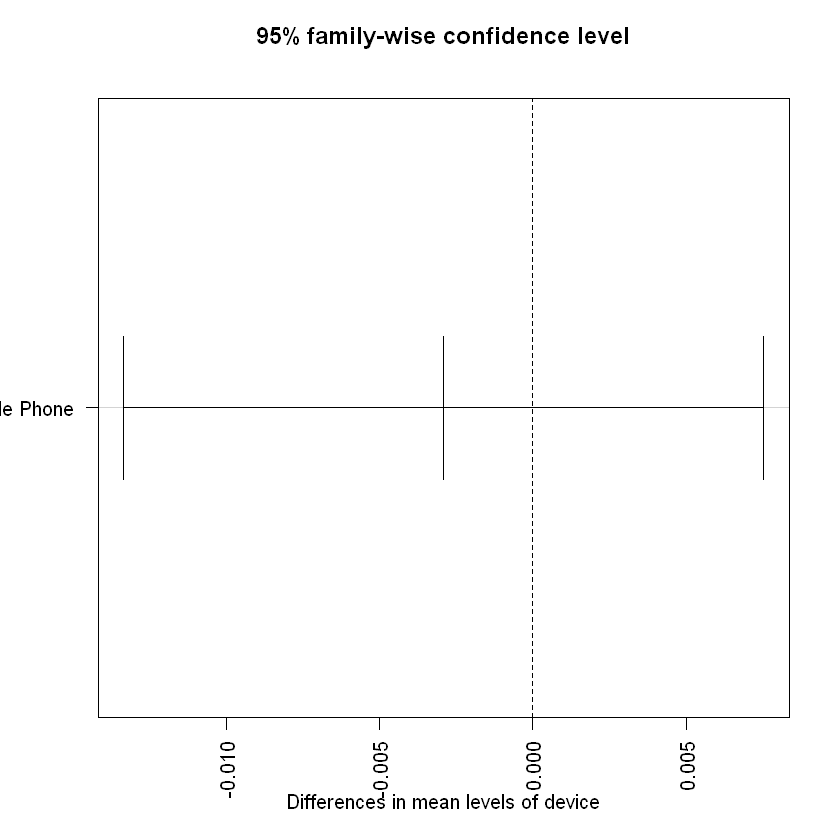

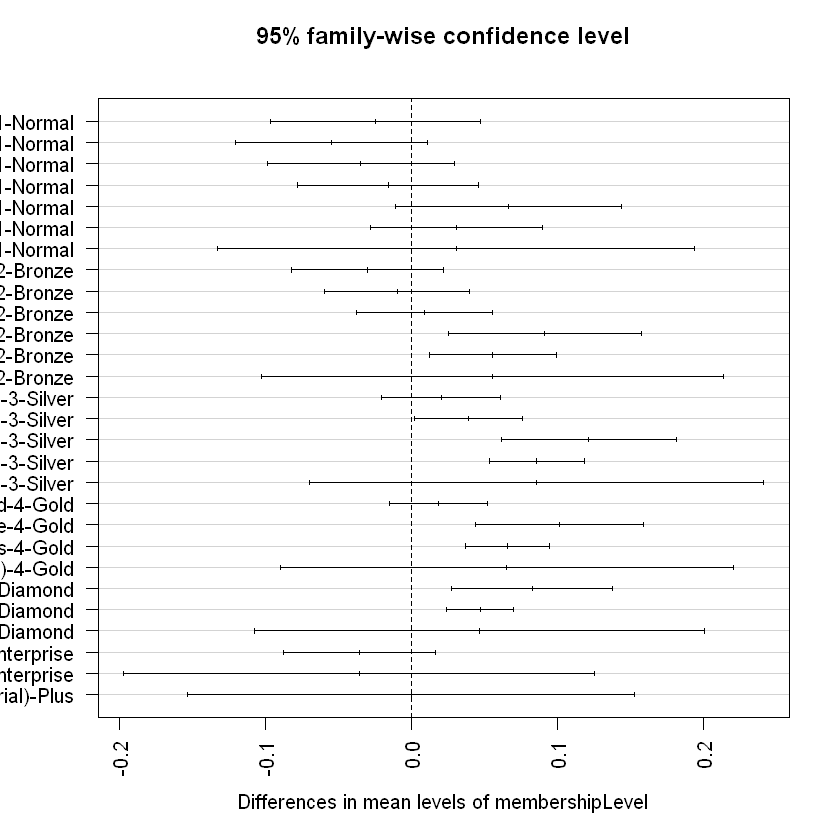

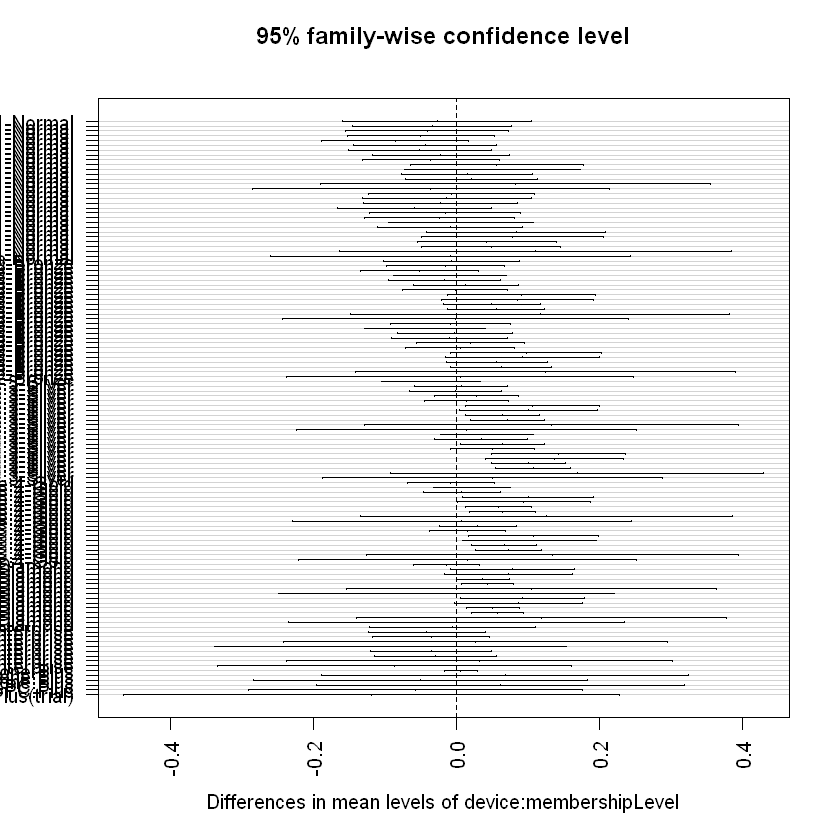

In [72]:
TukeyHSD(fit2)
par(las=2)
plot(TukeyHSD(fit2))

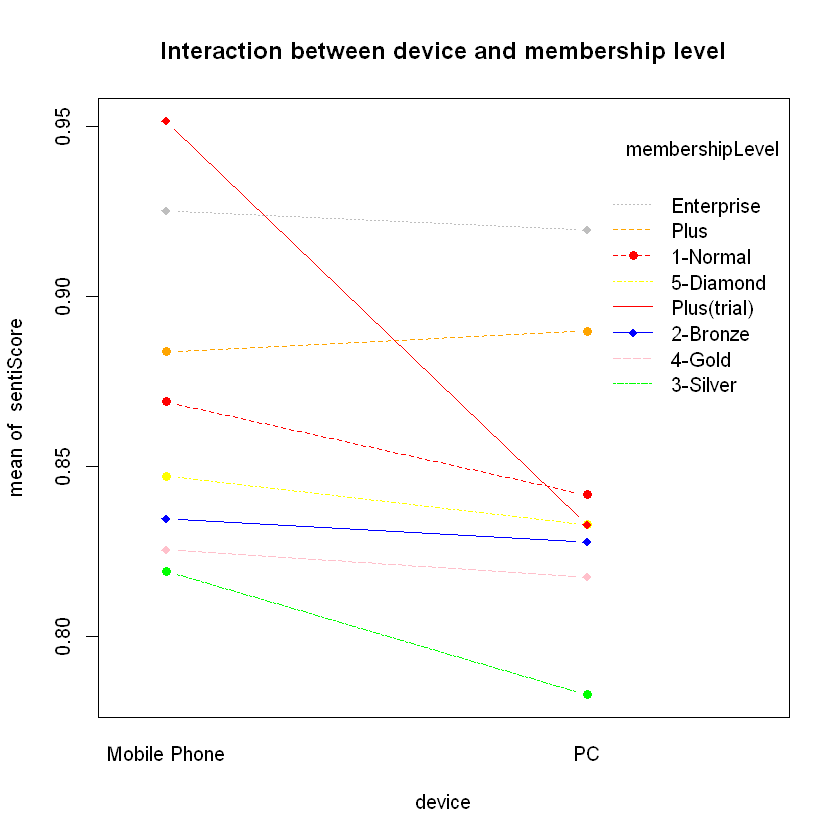

In [73]:
interaction.plot(device, membershipLevel, sentiScore, type="b",
col=c("red","blue","green","pink","yellow","grey","orange"), pch=c(16, 18),
main = "Interaction between device and membership level")

In [74]:
fit <- lm(sentiScore ~ productCate:device, data=df)
summary(fit)


Call:
lm(formula = sentiScore ~ productCate:device, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.93728  0.05053  0.09375  0.14223  0.25143 

Coefficients: (1 not defined because of singularities)
                                                      Estimate Std. Error
(Intercept)                                           0.861922   0.016434
productCateAccessories:deviceMobile Phone             0.024224   0.025013
productCateBooks & CDs:deviceMobile Phone            -0.077749   0.021272
productCateClothes:deviceMobile Phone                 0.069180   0.028367
productCateCosmetics:deviceMobile Phone               0.056298   0.030266
productCateDaily necessities:deviceMobile Phone       0.050487   0.021737
productCateDigital Product:deviceMobile Phone        -0.062995   0.018920
productCateFood & Drinks:deviceMobile Phone           0.059921   0.020312
productCateFurniture / Furnishing:deviceMobile Phone -0.024129   0.019303
productCateHome Appliance:deviceMobi

In [75]:
fit2 <- lm(sentiScore ~ membershipLevel:device, data=df)
summary(fit2)


Call:
lm(formula = sentiScore ~ membershipLevel:device, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.92523  0.05428  0.11025  0.11633  0.21713 

Coefficients: (1 not defined because of singularities)
                                                Estimate Std. Error t value
(Intercept)                                    8.328e-01  6.800e-02  12.247
membershipLevel1-Normal:deviceMobile Phone     3.624e-02  7.293e-02   0.497
membershipLevel2-Bronze:deviceMobile Phone     1.841e-03  7.066e-02   0.026
membershipLevel3-Silver:deviceMobile Phone    -1.372e-02  6.948e-02  -0.198
membershipLevel4-Gold:deviceMobile Phone      -7.438e-03  6.913e-02  -0.108
membershipLevel5-Diamond:deviceMobile Phone    1.424e-02  6.866e-02   0.207
membershipLevelEnterprise:deviceMobile Phone   9.244e-02  7.193e-02   1.285
membershipLevelPlus:deviceMobile Phone         5.089e-02  6.817e-02   0.746
membershipLevelPlus(trial):deviceMobile Phone  1.187e-01  1.012e-01   1.173
membershipLe

In [76]:
fit4 <- lm(sentiScore ~ source, data=df)
summary(fit4)


Call:
lm(formula = sentiScore ~ source, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.87490  0.05618  0.12509  0.13575  0.21925 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.874900   0.004798 182.338  < 2e-16 ***
sourceiPad            -0.076313   0.162811  -0.469  0.63928    
sourceiPhone          -0.017755   0.007938  -2.237  0.02532 *  
sourcePC              -0.010688   0.006115  -1.748  0.08053 .  
sourceQQ shopping      0.104526   0.162811   0.642  0.52088    
sourceWechat shopping -0.094150   0.031309  -3.007  0.00264 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2819 on 11048 degrees of freedom
Multiple R-squared:  0.001253,	Adjusted R-squared:  0.0008007 
F-statistic: 2.772 on 5 and 11048 DF,  p-value: 0.01659


In [77]:
fit5 <- lm(sentiScore ~ productCate:source, data=df)
summary(fit5)


Call:
lm(formula = sentiScore ~ productCate:source, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.94581  0.04572  0.09651  0.14241  0.50288 

Coefficients: (23 not defined because of singularities)
                                                          Estimate Std. Error
(Intercept)                                              0.9927867  0.1051310
productCateAccessories:sourceAndroid                    -0.0639608  0.1078420
productCateBooks & CDs:sourceAndroid                    -0.1953706  0.1064009
productCateClothes:sourceAndroid                        -0.0639892  0.1090572
productCateCosmetics:sourceAndroid                      -0.0483028  0.1101230
productCateDaily necessities:sourceAndroid              -0.0734410  0.1066658
productCateDigital Product:sourceAndroid                -0.1828101  0.1058335
productCateFood & Drinks:sourceAndroid                  -0.0644190  0.1061861
productCateFurniture / Furnishing:sourceAndroid         -0.1535123  0.105

In [78]:
fit6 <- lm(sentiScore ~ membershipLevel:source, data=df)
summary(fit6)


Call:
lm(formula = sentiScore ~ membershipLevel:source, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.94202  0.05214  0.11020  0.12280  0.37421 

Coefficients: (15 not defined because of singularities)
                                                  Estimate Std. Error t value
(Intercept)                                       0.689159   0.062645  11.001
membershipLevel1-Normal:sourceAndroid             0.174265   0.070128   2.485
membershipLevel2-Bronze:sourceAndroid             0.148852   0.066883   2.226
membershipLevel3-Silver:sourceAndroid             0.141465   0.064958   2.178
membershipLevel4-Gold:sourceAndroid               0.135881   0.064610   2.103
membershipLevel5-Diamond:sourceAndroid            0.180899   0.063867   2.832
membershipLevelEnterprise:sourceAndroid           0.252863   0.069328   3.647
membershipLevelPlus:sourceAndroid                 0.200350   0.062951   3.183
membershipLevelPlus(trial):sourceAndroid          0.217576   0.123033